In [1]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
import imutils

Using TensorFlow backend.


In [2]:
model = load_model('Face_Gesture_Recogizer_Final_1.h5')
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_alt.xml')

In [3]:
import keras
keras.__version__

'2.1.6'

In [4]:
import tensorflow as tf
tf.__version__

'1.11.0'

In [5]:
emoji = {
    0 : 'smile',
    1 : 'angry',
    2 : 'glass',
    3 : 'kiss'
}

4


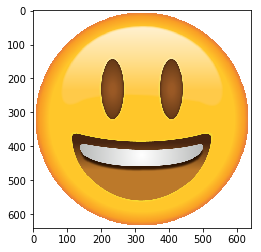

In [6]:
smile1 = cv2.cvtColor(cv2.imread('./emoji/smile.png'),cv2.COLOR_BGR2RGB)
angry1 = cv2.cvtColor(cv2.imread('./emoji/angry.png'),cv2.COLOR_BGR2RGB)
glass1 = cv2.cvtColor(cv2.imread('./emoji/glass.png'),cv2.COLOR_BGR2RGB)
kiss1 = cv2.cvtColor(cv2.imread('./emoji/kiss.png'),cv2.COLOR_BGR2RGB)
emoji_pics_rgb = []
emoji_pics_rgb.append(smile1)
emoji_pics_rgb.append(angry1)
emoji_pics_rgb.append(glass1)
emoji_pics_rgb.append(kiss1)
print(len(emoji_pics_rgb))
plt.imshow(emoji_pics_rgb[0])

(640, 640, 4)
4


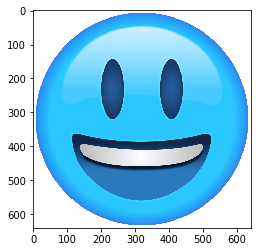

In [7]:
smile = cv2.imread('./emoji/smile.png',cv2.IMREAD_UNCHANGED)
angry = cv2.imread('./emoji/angry.png',cv2.IMREAD_UNCHANGED)
glass = cv2.imread('./emoji/glass.png',cv2.IMREAD_UNCHANGED)
kiss = cv2.imread('./emoji/kiss.png',cv2.IMREAD_UNCHANGED)
print(smile.shape)
emoji_pics = []
emoji_pics.append(smile)
emoji_pics.append(angry)
emoji_pics.append(glass)
emoji_pics.append(kiss)
print(len(emoji_pics))
plt.imshow(emoji_pics[0])

In [8]:
def predict(cur):
    fin_img = cv2.resize(cur, (100,100) )
    fin_img = np.array(fin_img)
    fin_img = fin_img.reshape( (1,100,100,3) )
    fin_img = fin_img/255.0
    result = model.predict( fin_img )
    num = np.argmax( result[0] )
    return num

In [10]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    frame = imutils.resize(frame, width=500)
    frame1 = frame
    cv2.imshow("Face", frame1)
    if ret==False:
        continue
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for face in faces[:1]:
        x,y,w,h = face
        offset = 7
        val = min(w,h)
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section = cv2.resize(face_section,(100,100))
        out = predict(face_section)
        cur_emoji = emoji_pics[out]
        cur_emoji = cv2.resize(cur_emoji,(w,h))
        alpha = cur_emoji[:,:,3]/255.0
        cur_emoji1=emoji_pics_rgb[out]
        cur_emoji1 = cv2.resize(cur_emoji1,(w,h))
        cur_emoji1=cv2.cvtColor(cur_emoji1,cv2.COLOR_BGR2RGB)
        frame[y:y+h, x:x+w, 0] = frame[y:y+h, x:x+w, 0] * (1-alpha) + alpha * cur_emoji1[:,:,0]
        frame[y:y+h, x:x+w, 1] = frame[y:y+h, x:x+w, 1] * (1-alpha) + alpha * cur_emoji1[:,:,1]
        frame[y:y+h, x:x+w, 2] = frame[y:y+h, x:x+w, 2] * (1-alpha) + alpha * cur_emoji1[:,:,2]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,255), 2)
#         frame[y:y+val,x:x+val]=cur_emoji
#         cv2.putText(frame, emoji[int(out)],(x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),2,cv2.LINE_AA)
    cv2.imshow("Emoji", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()